<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [2]:
# Import packages
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from __future__ import division

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

# Initial Exploration of Data

In [3]:
# Load the data
house = pd.read_csv('./housing.csv')

# Print head of house dataframe
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Print tail of dataframe
house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
# Print column headers of house
house.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'Pav

# Data Cleaning:
The data will be cleaned by:
* Removing duplicates
* Checking for null values
* Conversion of compatible columns to non-object types if possible
        

In [6]:
# Initial check of shape before manipulation
house.shape

(1460, 81)

In [7]:
# Drop duplicates found within dataframe
house.drop_duplicates()

# Check shape of dataframe to determine if changes occurred
house.shape

(1460, 81)

## Duplicates
It appears that there are no duplicates within the dataset. This is seen by calling .shape on the dataset before and after removing duplicates to check for changes

# Datatypes
* Using house.info() and the text file describing the dataset, we are able to determine which columns are considered categorical, and which ones contain continous data.

In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Continous Data
* MasVnrArea: Masonry veneer area in square feet
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* GarageYrBlt: Year garage was built
* GarageArea: Size of garage in square feet
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* MiscVal: (Dollar)Value of miscellaneous feature
* YrSold: Year Sold (YYYY)


## Discrete (potentially)

* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
* Kitchen: Kitchens above grade
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Fireplaces: Number of fireplaces
* GarageCars: Size of garage in car capacity
* MoSold: Month Sold (MM)


## Steps
* Attempt to convert all above points into non-object types. Other columns tend to hold categorical data, sometimes in the form of code strings (eg. two letter notation for MSzoning) or 1-10 ranking metrics.
* Those considered optional qualities of a house (such as Pool or fireplace) null values, are tolerated.


In [9]:
# Check for null values in each column
house.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

Upon closer inspection of the columns' null values, it is found that the null values are within columns that have reasonable reasons to be null. The important columns of MSZoning (used for filtering residential properties) and SalePrice (used as our target) contain no null values.

## Potential Dummy Variables
* MSSubClass: 16 dummies
* MSZoning: 8 Dummies
* Street: 4 Dummies
* Alley: 3 dummies
* LotShape: 4 dummies
* LandContour: 4 dummies
* Utilities: 4 dummies
* LotConfig: 4 dummies
* LandSlope: 3 dummies
* Neighborhood: 25 dummies
* Condition1: 9 dummies
* BldgType: 5 dummies
* HouseStyle: 8 dummies
* RoofStyle: 6 dummies
* RoofMatl: 8 dummies
* Exterior!st: 17 dummies
* MasVnrType: 5 dummies
* Foundation: 6 dummies
* BsmtExposure: 5 dummies
* Heating: 6 dummies
* CentralAir: Replace in column with binary
* Electrical: 5 dummies
* Functional: 8 dummmies
* GarageType: 7 dummies
* PavedDrive: 3 dummies
* MiscFeature: 6 dummies
* SaleType: 10 dummies
* SaleCondition: 6 dummies

## Conversion from categorical to numeric?
* ExterQual: Replace with 1-5?
* ExterCond: Replace 1-5?
* BsmtQual: Replace with values? (maybe)
* BsmtCond: Replace ith values 1-5
* BsmtFinType1: Replace with 7 levels
* HeatingQC: Replace with 5 levels
* KitchenQual: Replace with 1-5
* FireplaceQu: Replace with 0-5
* GarageFinish: 0-3
* GarageQual: 0-5
* GarageCond: 0-5
* PoolQC: 0-4
* Fence: 0-4

# Dummy Variable Creation and Concatenation

In [10]:
# Create dummy df of MSSubClass
Subclassdum = pd.get_dummies(house['MSSubClass'])

# Rename columns 
Subclassdum.columns = ['MSSub_20','MSSub_30','MSSub_40','MSSub_45','MSSub_50','MSSub_60','MSSub_70','MSSub_75',
                      'MSSub_80','MSSub_85','MSSub_90','MSSub_120','MSSub_160','MSSub_180','MSSub_190']

# Concatenate dummy variables into main df: house
house = pd.concat([house, Subclassdum], axis=1, join='outer')

In [11]:
# Create dummy df of MSZoning
Zoneclassdum = pd.get_dummies(house['MSZoning'])

# Rename columns
Zoneclassdum.columns = ['MSZon_Commercial','MSZon_Resi_FloatVillage','MSZon_Resi_HighDensity','MSZon_Resi_LowDensity',
                        'MSZon_Resi_MedDensity']

# Concatenate dummy variables into main df: house
house = pd.concat([house, Zoneclassdum], axis=1, join='outer')

In [12]:
# Create dummies
streetdum = pd.get_dummies(house['Street'])

# Rename columns
streetdum.columns = ['Street_Gravel', 'Street_Paved']

# Concatenate dummy variables into main df: house
house = pd.concat([house, streetdum], axis=1, join='outer')

In [13]:
# Create dummies
alleydum = pd.get_dummies(house['Alley'])

# Rename columns
alleydum.columns = ['Alley_Gravel', 'Alley_Paved']

# Concatenate dummy variables into main df: house
house = pd.concat([house, alleydum], axis=1, join='outer')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MSSub_190,MSZon_Commercial,MSZon_Resi_FloatVillage,MSZon_Resi_HighDensity,MSZon_Resi_LowDensity,MSZon_Resi_MedDensity,Street_Gravel,Street_Paved,Alley_Gravel,Alley_Paved
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,1,0,0,1,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,1,0,0,1,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,1,0,0,1,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,1,0,0,1,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,1,0,0,1,0,0


In [14]:
# Create dummies
lotshapedum = pd.get_dummies(house['LotShape'])

# Rename columns
lotshapedum.columns = ['LotSha_SlightIrregular','LotSha_ModIrregular','LotSha_Irregular',
                       'LotSha_Regular']

# Concatenate dummy variables into main df: house
house = pd.concat([house, lotshapedum], axis=1, join='outer')

In [15]:
# Create dummies
contourdum = pd.get_dummies(house['LandContour'])

# Rename columns
contourdum.columns = ['LContour_Banked','LContour_Hillside','LContour_Depression','LContour_Flat']

# Concatenate dummy variables into main df: house
house = pd.concat([house, contourdum], axis=1, join='outer')

In [16]:
# Create dummies
hooddum = pd.get_dummies(house['Neighborhood'])

# Rename columns
for i in hooddum.columns:
    hooddum.rename(columns={i: 'Hood_'+str(i)}, inplace=True)

# Concatenate dummy variables into main df: house
house = pd.concat([house, hooddum], axis=1, join='outer')

In [17]:
# Create dummies
condi1dum = pd.get_dummies(house['Condition1'])

# Rename columns
for i in condi1dum.columns:
    condi1dum.rename(columns={i: 'Condi1_'+str(i)}, inplace=True)
    
# Concatenate dummy variables into main df: house
house = pd.concat([house, condi1dum], axis=1, join='outer')

In [18]:
# Create dummies
bldgtypedum = pd.get_dummies(house['BldgType'])

# Rename columns
bldgtypedum.columns = ['BldgType_1fam','BldgType_2famconv','BldgType_duplex','BldgType_twnhsIns','BldgType_twnhsEnd',]

# Concatenate dummy variables into main df: house
house = pd.concat([house, bldgtypedum], axis=1, join='outer')

In [19]:
# Create dummies
houseStyleDum = pd.get_dummies(house['HouseStyle'])

# Rename columns
for i in houseStyleDum.columns:
    houseStyleDum.rename(columns={i: 'HouStyle_'+str(i)}, inplace=True)

# Concatenate dummy variables into main df: house
house = pd.concat([house, houseStyleDum], axis=1, join='outer')

In [20]:
# Create dummies
roofStyleDum = pd.get_dummies(house['RoofStyle'])

# Rename columns
for i in roofStyleDum.columns:
    roofStyleDum.rename(columns={i: 'RoofStyle_'+str(i)}, inplace=True)

# Concatenate dummy variables into main df: house
house = pd.concat([house, roofStyleDum], axis=1, join='outer')

In [21]:
# Create dummies
roofMatlDum = pd.get_dummies(house['RoofMatl'])

# Rename columns
for i in roofMatlDum.columns:
    roofMatlDum.rename(columns={i: 'RoofMatl_'+str(i)}, inplace=True)

# Concatenate dummy variables into main df: house
house = pd.concat([house, roofMatlDum], axis=1, join='outer')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,1,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,1,0,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,0,0


In [22]:
# Create dummies
ExteriorDum = pd.get_dummies(house['Exterior1st'])

# Rename columns
for i in ExteriorDum.columns:
    ExteriorDum.rename(columns={i: 'Exter1_'+str(i)}, inplace=True)
    
# Concatenate dummy variables into main df: house
house = pd.concat([house, ExteriorDum], axis=1, join='outer')

In [23]:
# Create dummies
MasVnrDum = pd.get_dummies(house['MasVnrType'])

# Rename columns
for i in MasVnrDum.columns:
    MasVnrDum.rename(columns={i: 'MasVnr_'+str(i)}, inplace=True)

# Concatenate dummy variables into main df: house
house = pd.concat([house, MasVnrDum], axis=1, join='outer')

In [24]:
# Create dummies
foundDum = pd.get_dummies(house['Foundation'])

# Rename columns
for i in foundDum.columns:
    foundDum.rename(columns={i: 'Fndtn_'+str(i)}, inplace=True)
    
# Concatenate dummy variables into main df: house
house = pd.concat([house, foundDum], axis=1, join='outer')

In [25]:
# Create dummies
utilDum = pd.get_dummies(house['Utilities'])

# Rename columns
utilDum.columns = ['Util_All', 'Util_NoSewa']

# Concatenate dummy variables into main df: house
house = pd.concat([house, utilDum], axis=1, join='outer')

In [26]:
# Create dummies
heatingDum = pd.get_dummies(house['Heating'])

# Rename columns
for i in heatingDum.columns:
    heatingDum.rename(columns={i: 'Heatg_'+str(i)}, inplace=True)
    
# Concatenate dummy variables into main df: house
house = pd.concat([house, heatingDum], axis=1, join='outer')

In [27]:
# Create dummies
electricDum = pd.get_dummies(house['Electrical'])

# Rename columns
for i in electricDum.columns:
    electricDum.rename(columns={i: 'Elec_'+str(i)}, inplace=True)

# Concatenate dummy variables into main df: house
house = pd.concat([house, electricDum], axis=1, join='outer')

In [28]:
# Create dummies
functionDum = pd.get_dummies(house['Functional'])

# Rename columns
for i in functionDum.columns:
    functionDum.rename(columns={i: 'Func_'+str(i)}, inplace=True)

# Concatenate dummy variables into main df: house
house = pd.concat([house, functionDum], axis=1, join='outer')

In [29]:
# Create dummies
garagetypeDum = pd.get_dummies(house['GarageType'])

# Rename columns
for i in garagetypeDum.columns:
    garagetypeDum.rename(columns={i: 'GarType_'+str(i)}, inplace=True)

# Concatenate dummy variables into main df: house
house = pd.concat([house, garagetypeDum], axis=1, join='outer')

In [30]:
# Create dummies
lotconDum = pd.get_dummies(house['LotConfig'])

# Rename columns
lotconDum.columns = ['LotCon_Corner','LotCon_CulDSac','LotCon_Front2','LotCon_Front3','LotCon_Inside',]

# Concatenate dummy variables into main df: house
house = pd.concat([house, lotconDum], axis=1, join='outer')

In [31]:
# Create dummies
pavedDriveDum = pd.get_dummies(house['PavedDrive'])

# Rename columns
pavedDriveDum.columns = ['Paved_DirtGrav', 'Paved_part', 'Paved_paved']

# Concatenate dummy variables into main df: house
house = pd.concat([house, pavedDriveDum], axis=1, join='outer')

In [32]:
# Create dummies
miscfeatDum = pd.get_dummies(house['MiscFeature'])

# Rename 1 column
miscfeatDum.rename(columns={'TenC': 'TenCrt'}, inplace=True)

# Rename all by looping and adding suffix
for i in miscfeatDum.columns:
    miscfeatDum.rename(columns={i: 'MiscFeat_'+str(i)}, inplace=True)

# Concatenate dummy variables into main df: house
house = pd.concat([house, miscfeatDum], axis=1, join='outer')

In [33]:
# Get dummies
saletypeDum = pd.get_dummies(house['SaleType'])

# Rename columns (more descriptive)
saletypeDum.columns = ['CrtOficDeedEst', 'CashWarrDeed', 'Con15dpReg', 'ConLwDp','ConLwInt',
                      'ConLwdpLwInt','New','Other', 'WarrDeed']
# Add prefix to columns
for i in saletypeDum.columns:
    saletypeDum.rename(columns={i: 'SaleType_'+str(i)}, inplace=True)

# Concatenate dummy variables into main df: house
house = pd.concat([house, saletypeDum], axis=1, join='outer')

In [34]:
# Get dummies
saleconDum = pd.get_dummies(house['SaleCondition'])

# Rename columns
for i in saleconDum.columns:
    saleconDum.rename(columns={i: 'SaleCond_'+str(i)}, inplace=True)

# Concatenate dummy variables into main df: house
house = pd.concat([house, saleconDum], axis=1, join='outer')

# Converting level based variables to numeric

In [35]:
# Map individual columns below to produce numeric values from unicode-based levels
house['ExterQual'] = house['ExterQual'].map({'Gd': 4, 'TA': 3, 'Ex': 5, 'Fa': 2})
house['ExterCond'] = house['ExterCond'].map({'Gd': 4, 'TA': 3, 'Ex': 5, 'Fa': 2, 'Po': 1})
house['BsmtQual'] = house['BsmtQual'].map({'Gd': 4, 'TA': 3, 'Ex': 5, 'Fa': 2, 'Po': 1, np.nan: 0})
house['BsmtCond'] = house['BsmtCond'].map({'Gd': 4, 'TA': 3, 'Ex': 5, 'Fa': 2, 'Po': 1, np.nan: 0})
house['BsmtFinType1'] = house['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ':2, 'Unf': 1, np.nan: 0})
house['HeatingQC'] = house['HeatingQC'].map({'Gd': 4, 'TA': 3, 'Ex': 5, 'Fa': 2, 'Po': 1, np.nan: 0})
house['CentralAir'] = house['CentralAir'].map({'Y': 1, 'N': 0})
house['KitchenQual'] = house['KitchenQual'].map({'Gd': 4, 'TA': 3, 'Ex': 5, 'Fa': 2, 'Po': 1, np.nan: 0})
house['FireplaceQu'] = house['FireplaceQu'].map({'Gd': 4, 'TA': 3, 'Ex': 5, 'Fa': 2, 'Po': 1, np.nan: 0})
house['GarageFinish'] = house['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, np.nan: 0})
house['GarageQual'] = house['GarageQual'].map({'Gd': 4, 'TA': 3, 'Ex': 5, 'Fa': 2, 'Po': 1, np.nan: 0})
house['GarageCond'] = house['GarageCond'].map({'Gd': 4, 'TA': 3, 'Ex': 5, 'Fa': 2, 'Po': 1, np.nan: 0})
house['PoolQC'] = house['PoolQC'].map({'Gd': 4, 'TA': 3, 'Ex': 5, 'Fa': 2, 'Po': 1, np.nan: 0})
house['Fence'] = house['Fence'].map({'MnPrv': 3, 'GdWo': 2, 'GdPrv': 4, 'MnWw': 1, np.nan: 0})
house['LandSlope'] = house['LandSlope'].map({'Gtl': 1, 'Mod': 2, 'Sev': 3})
house['BsmtExposure'] = house['BsmtExposure'].map({'Gd': 3,'Av': 2, 'Mn': 1,'No': 0, np.nan: 0})

# Replace null values with 0
house['LotFrontage'] = house['LotFrontage'].fillna(value=0)
house['Alley'] = house['Alley'].fillna(value=0)
house['MasVnrArea'].fillna(value=0, inplace=True)

#Replace null garage yr built to that of structure built
house['GarageYrBlt'].fillna(value=house['YearBuilt'], inplace=True)

# The house Dataframe will be renamed and further split into the required datasets

In [36]:
# Make a copy of house and assign to df
df = house.copy()

# Split test and train data by years: pre-2010, 2010
test = df[df['YrSold']==2010]
train = df[df['YrSold']<2010]

# Assign to traindf and testdf a filtered version of test and train data
# of only residential properties
traindf = train[(train['MSZon_Resi_FloatVillage']==1) | (train['MSZon_Resi_HighDensity']==1) | (train['MSZon_Resi_LowDensity']==1) | (train['MSZon_Resi_MedDensity']==1)]
testdf = test[(test['MSZon_Resi_FloatVillage']==1) | (test['MSZon_Resi_HighDensity']==1) | (test['MSZon_Resi_LowDensity']==1) | (test['MSZon_Resi_MedDensity']==1)]

## Residential Properties
The dataset contains a number of categories of properties within the MSZoning variable. Residential properties start with an R, with options of RH, RL, RP, RM. We will separate those properties considered residential and place them in a separate dataframe

# Determination of Predictors
## Fixed characteristics
The characteristics of a house determined to be fixed will be run through a correlation matrix to determine predictors.


### Converted to Dummy Variables
* MSSubclass
* MSZoning

* LotShape
* LandContour
* Utilities
* LotConfig
* LandSlope
* Neighborhood
* Condition1
* BldgType
* HouseStyle
* MasVnrType
* Foundation
* GarageType



### Ordinary Variables
* LotArea
* LotFrontage
* YearBuilt
* MasVnrArea
* BsmtExposure
* TotalBsmtSF
* 1stFlrSF
* 2ndFlrSF
* GrLivArea
* BsmtFullBath
* BsmtHalfBath
* Bedroom
* Kitchen
* Fireplaces
* GarageYrBlt
* GarageCars
* GarageArea
* WoodDeckSF
* OpenPorchSF
* EnclosedPorch
* 3SsnPorch
* ScreenPorch
* PoolArea




## Renovate-able characteristics
* OverallQual
* OverallCond
* ExterQual
* ExterCond
* BsmtQual
* BsmtCond
* BsmtFinType1
* Heating
* HeatingQC
* CentralAir
* Electrical : Dummy Variables
* KitchenQual
* Functional :Dummy
* FireplaceQu
* GarageFinish
* GarageQual
* GarageCond
* PavedDrive : Dummy
* PoolQC
* Fence
* TotRmsAbvGrd
* FullBath
* HalfBath
* RoofStyle
* RoofMatl
* Exterior1st

In [50]:
# Initialize training variables
fixedX_train = train.loc[:,['MSSub_20', 'MSSub_30', 'MSSub_40', 'MSSub_45', 'MSSub_50', 'MSSub_60', 'MSSub_70', 'MSSub_75',
                  'MSSub_80', 'MSSub_85', 'MSSub_90', 'MSSub_120', 'MSSub_160', 'MSSub_180', 'MSSub_190',
                  'MSZon_Commercial', 'MSZon_Resi_FloatVillage', 'MSZon_Resi_HighDensity', 'MSZon_Resi_LowDensity',
                  'MSZon_Resi_MedDensity','LotSha_SlightIrregular', 'LotSha_ModIrregular', 'LotSha_Irregular',
                  'LotSha_Regular','LContour_Banked', 'LContour_Hillside', 'LContour_Depression','LContour_Flat',
                  'Util_All', 'Util_NoSewa','LotCon_Corner', 'LotCon_CulDSac', 'LotCon_Front2','LotCon_Front3',
                  'LotCon_Inside', 'LandSlope', 'Hood_Blmngtn', 'Hood_Blueste', 'Hood_BrDale', 'Hood_BrkSide',
                  'Hood_ClearCr', 'Hood_CollgCr', 'Hood_Crawfor', 'Hood_Edwards','Hood_Gilbert', 'Hood_IDOTRR', 
                  'Hood_MeadowV', 'Hood_Mitchel','Hood_NAmes', 'Hood_NPkVill', 'Hood_NWAmes', 'Hood_NoRidge',
                  'Hood_NridgHt', 'Hood_OldTown', 'Hood_SWISU', 'Hood_Sawyer','Hood_SawyerW', 'Hood_Somerst', 'Hood_StoneBr', 
                  'Hood_Timber','Hood_Veenker','Condi1_Artery', 'Condi1_Feedr','Condi1_Norm', 'Condi1_PosA', 
                  'Condi1_PosN', 'Condi1_RRAe','Condi1_RRAn', 'Condi1_RRNe', 'Condi1_RRNn','BldgType_1fam', 
                  'BldgType_2famconv', 'BldgType_duplex','BldgType_twnhsIns', 'BldgType_twnhsEnd','HouStyle_1.5Fin',
                  'HouStyle_1.5Unf','HouStyle_1Story', 'HouStyle_2.5Fin', 'HouStyle_2.5Unf','HouStyle_2Story', 
                  'HouStyle_SFoyer', 'HouStyle_SLvl', 'MasVnr_BrkCmn', 'MasVnr_BrkFace','MasVnr_None', 'MasVnr_Stone',
                  'Fndtn_BrkTil', 'Fndtn_CBlock', 'Fndtn_PConc', 'Fndtn_Slab','Fndtn_Stone', 'Fndtn_Wood',
                  'GarType_2Types','GarType_Attchd', 'GarType_Basment', 'GarType_BuiltIn','GarType_CarPort', 
                  'GarType_Detchd','Street_Gravel','Street_Paved','LotFrontage', 'LotArea','YearBuilt','MasVnrArea',
                  'BsmtExposure','TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath','1stFlrSF', '2ndFlrSF','GrLivArea',
                  'BedroomAbvGr', 'KitchenAbvGr','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF',
                  'OpenPorchSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea','Alley_Gravel', 'Alley_Paved']]

# Initialize y_train
y_train=train['SalePrice']

In [51]:
# Initialize test variables
fixedX_test = test.loc[:,['MSSub_20', 'MSSub_30', 'MSSub_40', 'MSSub_45', 'MSSub_50', 'MSSub_60', 'MSSub_70', 'MSSub_75',
                  'MSSub_80', 'MSSub_85', 'MSSub_90', 'MSSub_120', 'MSSub_160', 'MSSub_180', 'MSSub_190',
                  'MSZon_Commercial', 'MSZon_Resi_FloatVillage', 'MSZon_Resi_HighDensity', 'MSZon_Resi_LowDensity',
                  'MSZon_Resi_MedDensity','LotSha_SlightIrregular', 'LotSha_ModIrregular', 'LotSha_Irregular',
                  'LotSha_Regular','LContour_Banked', 'LContour_Hillside', 'LContour_Depression','LContour_Flat',
                  'Util_All', 'Util_NoSewa','LotCon_Corner', 'LotCon_CulDSac', 'LotCon_Front2','LotCon_Front3',
                  'LotCon_Inside', 'LandSlope', 'Hood_Blmngtn', 'Hood_Blueste', 'Hood_BrDale', 'Hood_BrkSide',
                  'Hood_ClearCr', 'Hood_CollgCr', 'Hood_Crawfor', 'Hood_Edwards','Hood_Gilbert', 'Hood_IDOTRR', 
                  'Hood_MeadowV', 'Hood_Mitchel','Hood_NAmes', 'Hood_NPkVill', 'Hood_NWAmes', 'Hood_NoRidge',
                  'Hood_NridgHt', 'Hood_OldTown', 'Hood_SWISU', 'Hood_Sawyer','Hood_SawyerW', 'Hood_Somerst', 'Hood_StoneBr', 
                  'Hood_Timber','Hood_Veenker','Condi1_Artery', 'Condi1_Feedr','Condi1_Norm', 'Condi1_PosA', 
                  'Condi1_PosN', 'Condi1_RRAe','Condi1_RRAn', 'Condi1_RRNe', 'Condi1_RRNn','BldgType_1fam', 
                  'BldgType_2famconv', 'BldgType_duplex','BldgType_twnhsIns', 'BldgType_twnhsEnd','HouStyle_1.5Fin',
                  'HouStyle_1.5Unf','HouStyle_1Story', 'HouStyle_2.5Fin', 'HouStyle_2.5Unf','HouStyle_2Story', 
                  'HouStyle_SFoyer', 'HouStyle_SLvl', 'MasVnr_BrkCmn', 'MasVnr_BrkFace','MasVnr_None', 'MasVnr_Stone',
                  'Fndtn_BrkTil', 'Fndtn_CBlock', 'Fndtn_PConc', 'Fndtn_Slab','Fndtn_Stone', 'Fndtn_Wood',
                  'GarType_2Types','GarType_Attchd', 'GarType_Basment', 'GarType_BuiltIn','GarType_CarPort', 
                  'GarType_Detchd','Street_Gravel','Street_Paved','LotFrontage', 'LotArea','YearBuilt','MasVnrArea',
                  'BsmtExposure','TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath','1stFlrSF', '2ndFlrSF','GrLivArea',
                  'BedroomAbvGr', 'KitchenAbvGr','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF',
                  'OpenPorchSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea','Alley_Gravel', 'Alley_Paved']]

# Initialize y_test
y_test = test['SalePrice']

In [52]:
# Import packages
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from scipy.stats import zscore

# Standardize train and test X
standFixed = fixedX_train.apply(zscore, axis=1)
standFixed_test = fixedX_test.apply(zscore, axis=1)

# Assign model to ridge regression and fit to training data
model = Ridge(alpha=3)
model.fit(standFixed, y_train)

# Fit RFE to current model
rfe = RFE(model)
rfe = rfe.fit(standFixed, y_train)

In [53]:
# Print results of RFE
print(rfe.support_)
print(rfe.ranking_)
standFixed.columns[rfe.support_].values

[ True False False False  True False  True  True  True False  True False
  True False  True  True False False  True False False False False  True
 False False False  True  True False  True False  True False False False
  True False  True False  True False False  True False  True False  True
  True False  True False False  True  True  True False False False False
 False  True  True False False False False False False False False  True
  True False False  True False  True False  True False False False  True
  True False False  True  True False False  True False  True False False
 False  True  True False False  True  True  True  True  True  True False
  True  True  True  True  True  True False  True False  True  True  True
  True  True  True  True  True  True]
[ 1 38 13 32  1 63  1  1  1 25  1 39  1 59  1  1 42  8  1 21 60 35 20  1 17
 47 22  1  1 14  1 44  1 24 34 26  1  2  1 45  1 51 40  1 41  1 54  1  1  6
  1 52 61  1  1  1  9 48 49 33 27  1  1 57 15 11  4 12 18 23 50  1  1 37 29
  1 

array(['MSSub_20', 'MSSub_50', 'MSSub_70', 'MSSub_75', 'MSSub_80',
       'MSSub_90', 'MSSub_160', 'MSSub_190', 'MSZon_Commercial',
       'MSZon_Resi_LowDensity', 'LotSha_Regular', 'LContour_Flat',
       'Util_All', 'LotCon_Corner', 'LotCon_Front2', 'Hood_Blmngtn',
       'Hood_BrDale', 'Hood_ClearCr', 'Hood_Edwards', 'Hood_IDOTRR',
       'Hood_Mitchel', 'Hood_NAmes', 'Hood_NWAmes', 'Hood_OldTown',
       'Hood_SWISU', 'Hood_Sawyer', 'Condi1_Artery', 'Condi1_Feedr',
       'BldgType_2famconv', 'BldgType_duplex', 'HouStyle_1.5Fin',
       'HouStyle_1Story', 'HouStyle_2.5Unf', 'MasVnr_BrkCmn',
       'MasVnr_BrkFace', 'Fndtn_BrkTil', 'Fndtn_CBlock', 'Fndtn_Stone',
       'GarType_2Types', 'GarType_CarPort', 'GarType_Detchd',
       'LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtExposure',
       'TotalBsmtSF', 'BsmtHalfBath', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'GarageYrBlt', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'Enclosed

In [54]:
# Import score packages
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Calculate cross val score and mean
scores = cross_val_score(model,standFixed_test,y=y_test)
print('All scores: {}\n Mean:{}'.format(scores, scores.mean()))

All scores: [ 0.62879248  0.41551033  0.65223628]
 Mean:0.565513029677


In [55]:
# Generate predicted value based on model
y_pred = model.predict(standFixed_test)

# Root mean squared error
np.sqrt(mean_squared_error(y_test, y_pred))

50665.314686735706

# Attempt to create an improved model
* By removing predictors not included in above returned list from RFE, hope for a better performing model
* Score appears to decrease, meaning above model is better. Model above is used.

In [43]:
# Assign reduced number of predictors returned by RFE: Fixedfin_train, Fixedfin_test
Fixedfin_train = train.loc[:,['MSSub_20', 'MSSub_50', 'MSSub_70', 'MSSub_75', 'MSSub_80',
       'MSSub_90', 'MSSub_160', 'MSSub_190', 'MSZon_Commercial',
       'MSZon_Resi_LowDensity', 'LotSha_Regular', 'LContour_Flat',
       'Util_All', 'LotCon_Corner', 'LotCon_Front2', 'Hood_Blmngtn',
       'Hood_BrDale', 'Hood_ClearCr', 'Hood_Edwards', 'Hood_IDOTRR',
       'Hood_Mitchel', 'Hood_NAmes', 'Hood_NWAmes', 'Hood_OldTown',
       'Hood_SWISU', 'Hood_Sawyer', 'Condi1_Artery', 'Condi1_Feedr',
       'BldgType_2famconv', 'BldgType_duplex', 'HouStyle_1.5Fin',
       'HouStyle_1Story', 'HouStyle_2.5Unf', 'MasVnr_BrkCmn',
       'MasVnr_BrkFace', 'Fndtn_BrkTil', 'Fndtn_CBlock', 'Fndtn_Stone',
       'GarType_2Types', 'GarType_CarPort', 'GarType_Detchd',
       'LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtExposure',
       'TotalBsmtSF', 'BsmtHalfBath', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'GarageYrBlt', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Alley_Gravel', 'Alley_Paved']]

Fixedfin_test= test.loc[:,['MSSub_20', 'MSSub_50', 'MSSub_70', 'MSSub_75', 'MSSub_80',
       'MSSub_90', 'MSSub_160', 'MSSub_190', 'MSZon_Commercial',
       'MSZon_Resi_LowDensity', 'LotSha_Regular', 'LContour_Flat',
       'Util_All', 'LotCon_Corner', 'LotCon_Front2', 'Hood_Blmngtn',
       'Hood_BrDale', 'Hood_ClearCr', 'Hood_Edwards', 'Hood_IDOTRR',
       'Hood_Mitchel', 'Hood_NAmes', 'Hood_NWAmes', 'Hood_OldTown',
       'Hood_SWISU', 'Hood_Sawyer', 'Condi1_Artery', 'Condi1_Feedr',
       'BldgType_2famconv', 'BldgType_duplex', 'HouStyle_1.5Fin',
       'HouStyle_1Story', 'HouStyle_2.5Unf', 'MasVnr_BrkCmn',
       'MasVnr_BrkFace', 'Fndtn_BrkTil', 'Fndtn_CBlock', 'Fndtn_Stone',
       'GarType_2Types', 'GarType_CarPort', 'GarType_Detchd',
       'LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtExposure',
       'TotalBsmtSF', 'BsmtHalfBath', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'GarageYrBlt', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Alley_Gravel', 'Alley_Paved']]

In [44]:
# Standardize new set of predictors
standFixed = Fixedfin_train.apply(zscore, axis=1)
standFixed_test = Fixedfin_test.apply(zscore, axis=1)

# Instantiate model
model = Ridge(alpha=3)

# Fit model to training data
model.fit(standFixed, y_train)

Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [45]:
# Generate cross val score
rfescores = cross_val_score(model,standFixed_test,y=y_test)
print('All scores: {}\n Mean:{}'.format(rfescores, rfescores.mean()))

All scores: [ 0.61968774  0.40891897  0.63597798]
 Mean:0.554861561447


In [46]:
# Generate predicted values
y_pred = model.predict(standFixed_test)
# Generate RMSE for scoring
np.sqrt(mean_squared_error(y_test, y_pred))

50918.32492057811

# Use of GridSearch to improve parameters of model
* Results of GridSearch.best_params_ used above

In [47]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.1,0.2,0.4,0.6,0.8,1,3,5,8,10],
          'solver': ['auto', 'lsqr', 'sag']
    
}

search = GridSearchCV(model, params, n_jobs=3)

In [48]:
search.fit(fixedX_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'alpha': [0.1, 0.2, 0.4, 0.6, 0.8, 1, 3, 5, 8, 10], 'solver': ['auto', 'lsqr', 'sag']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [49]:
# Print results of Gridsearch for use
print(search.best_params_)
print(search.best_score_)

{'alpha': 3, 'solver': 'auto'}
0.780240218403


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

# Calculation of y_hat (residuals)

In [59]:
y_hat = y_test-y_pred
y_hat

16      -17363.132508
24         871.350097
26       -2910.293481
27       65734.286107
33      -38459.242002
38      -24841.539262
45       52592.610477
52      -21394.137086
63      -27592.885117
66      -70501.611831
68       41225.163792
73      -21232.470632
74      -42273.488269
78      -60868.704163
98      -37659.173134
99       -9315.617620
100     -12395.338756
101     -19337.395454
103       9648.928083
109     -65914.475644
111      54785.305187
118      28319.514883
140      -1647.528562
142      -9892.051253
147      13596.563660
157      58861.107105
158      38050.109319
162       3277.257709
171      -6366.815667
200     -19484.176681
            ...      
1247    -28239.389022
1250    -10545.863090
1267    123234.684987
1270     42424.589599
1279    -56947.394066
1283    -24755.228281
1284    -42064.747818
1286    -63918.393730
1290     -9204.049572
1299     -8686.433642
1310     97550.635177
1313     62729.512563
1322     -9484.497532
1353     98100.974910
1357    -2

In [100]:
y_test.shape

(175,)

In [82]:
residuals = pd.DataFrame(y_hat)
residuals.rename(columns={'SalePrice': 'Residuals'}, inplace=True)

In [98]:
residuals.shape

(175, 1)

# Residual Plot

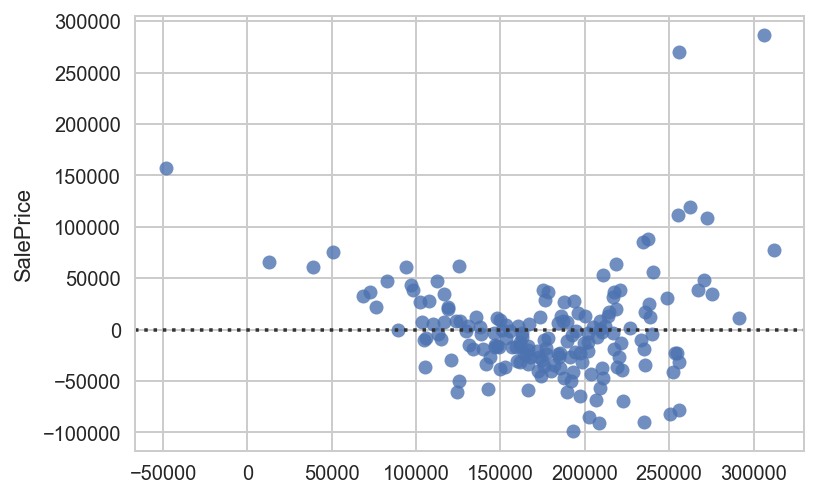

In [83]:
sns.residplot(x=y_pred, y=y_test, data=residuals)

# Declare train and test variables

In [101]:
# Assign renovatable characteristics to renoX_train and renoX_test
renoX_train = train.loc[:,['OverallQual', 'OverallCond','FireplaceQu','GarageFinish','GarageQual', 'GarageCond', 'PoolQC',
                         'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond','BsmtFinType1','Heatg_Floor', 'Heatg_GasA', 
                         'Heatg_GasW', 'Heatg_Grav','Heatg_OthW', 'Heatg_Wall','HeatingQC','CentralAir', 'Elec_FuseA',
                         'Elec_FuseF', 'Elec_FuseP', 'Elec_Mix','Elec_SBrkr','KitchenQual', 'Func_Maj1', 'Func_Maj2', 
                         'Func_Min1', 'Func_Min2','Func_Mod', 'Func_Sev', 'Func_Typ','Paved_DirtGrav','Paved_part', 
                         'Paved_paved', 'Fence', 'TotRmsAbvGrd','FullBath', 'HalfBath','RoofStyle_Flat', 
                         'RoofStyle_Gable','RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard','RoofStyle_Shed',
                         'RoofMatl_ClyTile', 'RoofMatl_CompShg','RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
                         'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl','Exter1_AsbShng', 'Exter1_AsphShn',
                         'Exter1_BrkComm','Exter1_BrkFace', 'Exter1_CBlock','Exter1_CemntBd','Exter1_HdBoard', 
                         'Exter1_ImStucc', 'Exter1_MetalSd','Exter1_Plywood', 'Exter1_Stone', 'Exter1_Stucco', 
                         'Exter1_VinylSd','Exter1_Wd Sdng', 'Exter1_WdShing']]

renoX_test = test.loc[:,['OverallQual', 'OverallCond','FireplaceQu','GarageFinish','GarageQual', 'GarageCond', 'PoolQC',
                         'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond','BsmtFinType1','Heatg_Floor', 'Heatg_GasA', 
                         'Heatg_GasW', 'Heatg_Grav','Heatg_OthW', 'Heatg_Wall','HeatingQC','CentralAir', 'Elec_FuseA',
                         'Elec_FuseF', 'Elec_FuseP', 'Elec_Mix','Elec_SBrkr','KitchenQual', 'Func_Maj1', 'Func_Maj2', 
                         'Func_Min1', 'Func_Min2','Func_Mod', 'Func_Sev', 'Func_Typ','Paved_DirtGrav','Paved_part', 
                         'Paved_paved', 'Fence', 'TotRmsAbvGrd','FullBath', 'HalfBath','RoofStyle_Flat', 
                         'RoofStyle_Gable','RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard','RoofStyle_Shed',
                         'RoofMatl_ClyTile', 'RoofMatl_CompShg','RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
                         'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl','Exter1_AsbShng', 'Exter1_AsphShn',
                         'Exter1_BrkComm','Exter1_BrkFace', 'Exter1_CBlock','Exter1_CemntBd','Exter1_HdBoard', 
                         'Exter1_ImStucc', 'Exter1_MetalSd','Exter1_Plywood', 'Exter1_Stone', 'Exter1_Stucco', 
                         'Exter1_VinylSd','Exter1_Wd Sdng', 'Exter1_WdShing']]

renoY_train = train.loc[:, ['SalePrice']]

renoY_test = residuals['Residuals']

In [102]:
model.fit(renoX_train, renoY_train)

Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [108]:
y_pred = model.predict(renoX_test)

resiscore = cross_val_score(model, renoX_test, y=renoY_test)

print('Score of model predicting residuals:\nScores: {}\nMean: {}'.format(resiscore, resiscore.mean()))

Score of model predicting residuals:
Scores: [-0.08683367  0.28674918  0.53175866]
Mean: 0.243891388477


# Model Built to Account for Residuals
### Goal was to build a model based on renovatable features to predict whether residuals (errors) of previous model can be accounted for

* Model's score (above) is quite low with a mean of 24%. ie) 24% of the residuals can be explained by this model
* This indicates that previous residuals were NOT irreducible, and a more accurate model is possible. However, due to the requirements of splitting characteristics by fixed and renovatable, we are unable to use all variables in a single model.



# Determining Dollar Value
* We only have access to the dollar value of misc features
* They are grouped below and presented with the mean of their values

In [141]:
df.groupby('MiscFeature')['MiscVal'].count()

MiscFeature
Gar2     2
Othr     2
Shed    49
TenC     1
Name: MiscVal, dtype: int64

In [140]:
df.groupby('MiscFeature')['MiscVal'].mean()

MiscFeature
Gar2    11900.000000
Othr     1750.000000
Shed      697.836735
TenC     2000.000000
Name: MiscVal, dtype: float64

In [147]:
df[['MiscFeature','MiscVal']][df['MiscFeature']=='Othr']

,MiscFeature,MiscVal
705,Othr,3500
873,Othr,0


# Miscellaneous Value
* Garage 2 is seen as the most valuable, with a value of \$11,900
* Tennis court is valued at approx. \$2000 (Only one case)
* Shed is approximately valued at \$698.00
* Others have 2 values, with one at \$3500 and the other at \$0

In [128]:
featcoefs = pd.DataFrame({'Features': renoX_train.columns.values, 'Coefs': [i for x in model.coef_ for i in x]}).sort_values(by='Coefs', ascending=False)

In [154]:
featcoefs = featcoefs[['Features', 'Coefs']]
featcoefs

,Features,Coefs
53,RoofMatl_WdShngl,79934.186433
40,RoofStyle_Flat,22753.637184
0,OverallQual,16515.471517
9,BsmtQual,15494.570539
57,Exter1_BrkFace,14966.869051
29,Func_Min2,14338.649172
7,ExterQual,14321.235413
25,KitchenQual,13172.198292
6,PoolQC,12166.696221
48,RoofMatl_Membran,11475.441199


# How to use Model

1. When purchasing a house, first check to see if any renovatable features are available.
2. Compare these features to the Features/Coefs table above to see rank of impact on SalePrice according to the model
3. Items higher on the list will generally provide a higher return on investment, whereas lower ones provide lower returns for the renovated feature
4. If the renovated item is a second garage, a tennis court or a shed, observe the value found above, and ensure not to go over the value as it's likely that you will not receive a greater return on investment
5. As an extremely general rule of thumb, limit expenditure on renovations by item to $3500, as for renovations categorised as 'other' (vague), seem to be valued as such

# Model Evaluation
Overall, the model of fixed characteristics explains 56.5% of the results, and the renovated characteristic model explains 24.4% of the residuals of the first model.  This is not a very accurate and well-performing model.

As such, I would recommend further due diligence before committing to the purchase and renovation of a house.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [ ]:
# A: